## Clustering

We will expand upon the presentation of k-means given in Jake Vanderplas' [tutorial on the subject](https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb).

### K-Means Cost Function

The k-means algorithm seeks to determine a set of k cluster center $c_1, c_2, \ldots, c_k$ that is a "good" clustering for a set of $n$ datapoints $x_1, x_2, \ldots, x_n$ where $c_i \in \mathbb{R}^d$ and $x_i \in \mathbb{R}^d$.  To formalize the notion of goodness (or more precisely badness), we define the following cost function given the cluster centers and the assignments, $a_i \in \{1, \ldots, k\}$, of datapoints to clusters.

$$cost(c_1, \ldots, c_k, a_1, \ldots, a_n)= \sum_{i=1}^n \left | x_i - c_{a_i} \right |^2$$

While this cost function looks hairy, it's pretty intuitive to understand.  The cost associated with a clustering is given by the sum of the squared distances between each datapoint and the cluster it is assigned to.  That's all there is to it!

### Optimizing the K-Means Cost Function

While it's all well and good to talk about the cost function above, if we can't find optimal values for the cluster centers and assignments, then it's not all the much use to us.  First the bad news, it is difficult to find the global optimum of our cost function over all possible cluster centers and cluster assignments.  The good news is that we can define a very simple to implement procedure for finding a locally optimal solution that works well in practice.

### The Alternating Minimization Algorithm

In order to optimize our cost function we will be using an algorithm that involves alternatingly minimizing the cost function across one set of variables (the cluster assignments) and then the other (the cluster centers).  Jake Vanderplas refers to this algorithm as the EM algorithm.  While the EM algorithm has this same flavor, at least in this basic formulation, we are not truly using the EM algorithm.

Our optimization of the cost function will be carried out in two steps.  The first step will be optimizing the cluster assignments given fixed cluster centers.  The second step will be optimizing the cluster centers given gixed cluster assignments.

#### Optimizing Cluster Assignments

We can state our objective formally as:

$$\begin{align}
a_1, \ldots, a_n &= \arg\min_{a_1, \ldots, a_n} cost(c_1, \ldots, c_k, a_1, \ldots, a_n) \\
                   &=\arg\min_{a_1, \ldots, a_n}  \sum_{i=1}^n \left | x_i - c_{a_i} \right |^2\end{align}$$

A few questions:
1.  In plain English, what does the above equation mean?
2.  How would you solve the equation?  That is, how would you determine the optimal cluster assignments?  I'll leave the level of formality of your argument up to you, but you should make sure you have a solid grasp of what the solution is and intuitively why it's true.

#### Optimizing Cluster Centers

Once we have determined optimal assignments of points to cluster centers, we have to determine the optimal cluster centers for these new assignments.  Formally we can state this as:

$$\begin{align}
c_1, \ldots, c_k &= \arg\min_{c_1, \ldots, c_k} cost(c_1, \ldots, c_k, a_1, \ldots, a_n) \\
                   &=\arg\min_{c_1, \ldots, c_k}  \sum_{i=1}^n \left | x_i - c_{a_i} \right |^2\end{align}$$
                   
A few questions:
1.  In plain English, what does the above equation mean?
2.  How would you solve the equation? (don't peek at the next part)

One method for solving the equation above is to first split the problem up into $k$ separate optimization problems (one for each cluster center).  For each subproblem, compute the gradient of the cost function with respect to the cluster center.  Set the gradient to 0 and then solve.  At the whiteboard, use this strategy to determine the solution to the equation above.  If you are not comfortable with the concept of a gradient, you can simplify the problem by assuming that $d = 1$ (that is $c_i \in \mathbb{R}$ and $x_i \in \mathbb{R}$).

### Practical Considerations with k-means

Unfortunately, k-means is not a magical algorithm.  There are a number of concerns you have to think about when applying it.  Here are some questions to get you thinking:

1.  Is the solution to k-means sensitive to the mean of each dimension of the data?  In other words, how (if at all) would the clustering you get from the k-means algorithm be affected if you changed the mean of each data dimension.
2.  Is the solution to k-means sensitive to the standard deviation of each dimension of the data?  You can answer this question either through a mathematical argument or a theoretical argument (use the code block below to help you get started if you want to pursue an empirical argument).
3.  If the clusters are not spherical, what would the behavior of k-means be?
4.  If the data is unimodal, meaning it doesn't have clusters, how would k-means behave?

See below for some code that might help you to explore some of the questions above empirically.

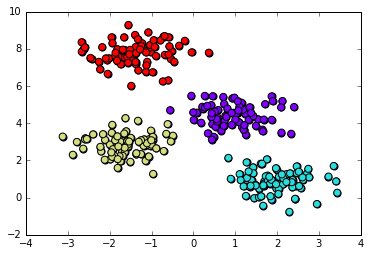

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50)
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

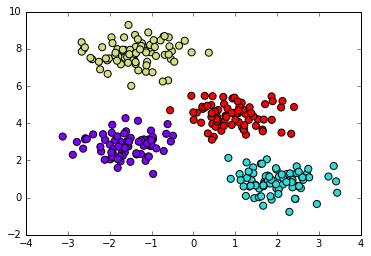

In [3]:
import numpy as np

scale_factor = 1
X_scaled = np.copy(X)
X_scaled[:,0] *= scale_factor
est = KMeans(4)  # 4 clusters
est.fit(X_scaled)
y_kmeans = est.predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='rainbow');

### Beyond K-Means

There are a number of ways in which k-means might fail:
1.  The clusters have non-flat structure
2.  The number of points per cluster is not even (k-means has difficulty with this).
3.  Outliers

The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a really interesting taxonomy of various clustering algorithms along with some code that compares their behavior on some examples.  Here's the relevant code for your convenience.

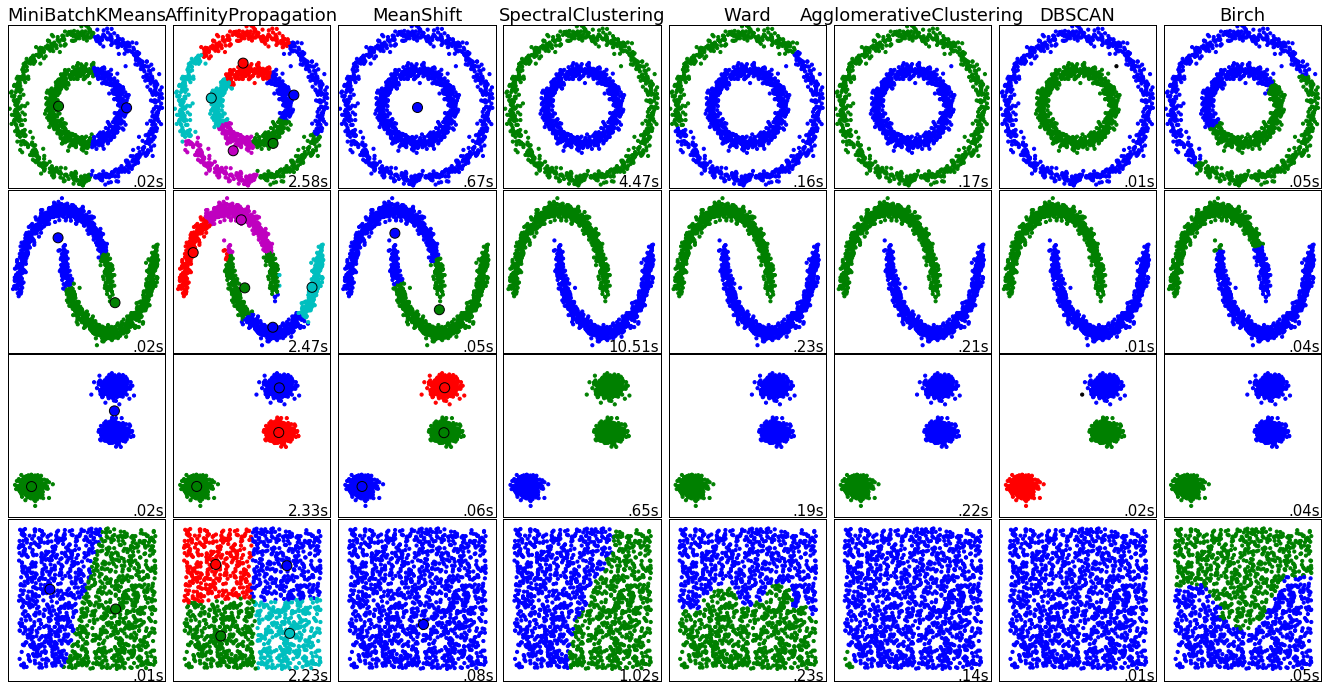

In [5]:
# original source: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

As a final super cool thing, check out [this Github repo](https://github.com/brandomr/document_cluster) that shows document clustering.  The ipython notebook covers a bunch of topics (some of which we haven't discussed yet), but I hope you will find it compelling both for reinforcing specific content knowledge and also for inspiring additional explorations.